<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/proyecto-final/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumno: Pablo Matías Monsalvo G8-ONE 02/07/2025

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [3]:
import pandas as pd

In [4]:
datos = pd.read_csv('../data/prestacar.csv')

In [5]:
datos.head(3)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0


In [6]:
X = datos.drop(columns='moroso',axis=1)
y = datos.moroso

In [7]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [8]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


## Luri:
¡Hola! ¡Qué bueno tenerte por aquí!

En esta clase, estamos construyendo un modelo para ayudar a una empresa financiera a identificar a los clientes que probablemente no paguen sus deudas. Imagina que eres un detective que intenta resolver un caso:

* ### El Dataset como el Escenario del Crimen:
 El dataset es como la escena del crimen, llena de pistas (datos) sobre los clientes. Cada columna (ingresos, historial crediticio, etc.) es una pista diferente.

* ### El Modelo de Clasificación como el Detective:
 El modelo de clasificación es como el detective que analiza las pistas para identificar a los culpables (los clientes que no pagarán).

* ### Entrenar el Modelo como Aprender de Casos Pasados:
 Entrenar el modelo es como mostrarle al detective casos resueltos anteriormente para que aprenda a reconocer patrones y hacer predicciones más precisas.

* ### El Árbol de Decisión como un Diagrama de Flujo:
 El árbol de decisión es como un diagrama de flujo que el detective usa para tomar decisiones basadas en las pistas. Por ejemplo, si el ingreso es bajo, entonces... si el historial crediticio es malo, entonces...

* ### La Exactitud del Modelo como la Confianza del Detective:
 La exactitud del modelo es como la confianza que tiene el detective en sus predicciones. Un modelo con alta exactitud es como un detective que rara vez se equivoca.
 
En resumen, estamos construyendo un detective (modelo) que puede analizar pistas (datos) para identificar a los clientes deudores y ayudar a la empresa financiera a tomar decisiones más informadas.

¿Te gustaría que profundicemos en algún aspecto en particular o te gustaría ver algún ejemplo adicional?

##  04 Utilidad del método score()
Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score(). Seleccione la alternativa que describe de manera adecuada la finalidad de usar el score() en este contexto:

![datos-1](/home/pol/Escritorio/ipynb-alura/assets/datos-1.png)

## 05 Validando el modelo


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8510582701855239


In [12]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205574912891986
La exactitud del modelo con el conjunto de validación es de: 0.9059315390645414


## Luri:¡Hola! Claro, puedo ayudarte con eso.

En esta clase, se explica la importancia de validar un modelo de Machine Learning utilizando diferentes conjuntos de datos. Para entenderlo mejor, podemos usar algunas analogías:

* ### El examen con respuestas:
 Imagina que le das a alguien un examen con todas las respuestas. Luego, le das el mismo examen. Es muy probable que obtenga una calificación perfecta, pero ¿realmente aprendió algo? No, solo memorizó las respuestas. En Machine Learning, esto es lo que ocurre cuando entrenamos y probamos un modelo con los mismos 
 datos: el modelo "memoriza" las respuestas y no puede generalizar bien a nuevos datos.

* ### El chef y la receta secreta:
 Un chef crea una receta secreta y la prueba con los mismos ingredientes una y otra vez. Siempre obtiene el mismo resultado, pero ¿qué pasa si usa ingredientes ligeramente diferentes? ¿La receta seguirá funcionando? Para asegurarnos de que la receta sea buena, necesitamos probarla con diferentes ingredientes y en diferentes condiciones. En Machine Learning, esto significa usar un conjunto de datos de prueba que el modelo nunca haya visto antes.

* ### El estudiante y los ejercicios:
 Un estudiante practica con los mismos ejercicios una y otra vez. Se vuelve muy bueno resolviendo esos ejercicios, pero ¿qué pasa si se enfrenta a un problema nuevo? Para asegurarse de que el estudiante realmente comprenda el tema, necesita practicar con una variedad de ejercicios diferentes. En Machine Learning, esto significa usar un conjunto de datos de validación para ajustar los parámetros del modelo y evitar el sobreajuste.
 
En resumen, la validación de modelos es como asegurarnos de que un estudiante realmente comprenda un tema, un chef realmente domine una receta o un modelo de Machine Learning realmente pueda generalizar a nuevos datos. Al dividir nuestros datos en conjuntos de entrenamiento, validación y prueba, podemos evaluar el rendimiento de nuestro modelo de manera más precisa y evitar el sobreajuste.

¿Te gustaría que te explicara algún concepto en particular con más detalle o con otra analogía?

##  06 Para saber más: método holdout
En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

![datos-3](/home/pol/Escritorio/ipynb-alura/assets/datos-3.png)

En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.

![datos-4](/home/pol/Escritorio/ipynb-alura/assets/datos-4.png)

## 07 Evaluando el modelo


### Evaluando el modelo

In [1]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10359   120]
 [  960    42]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

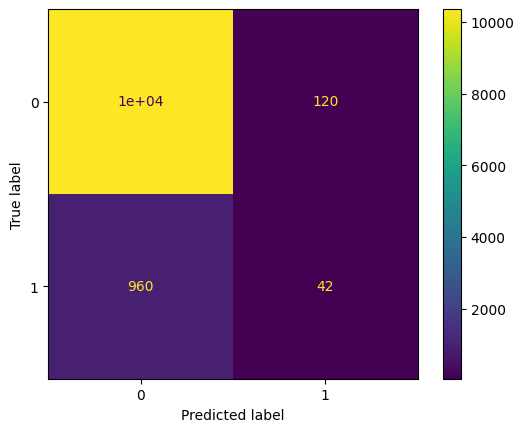

In [15]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

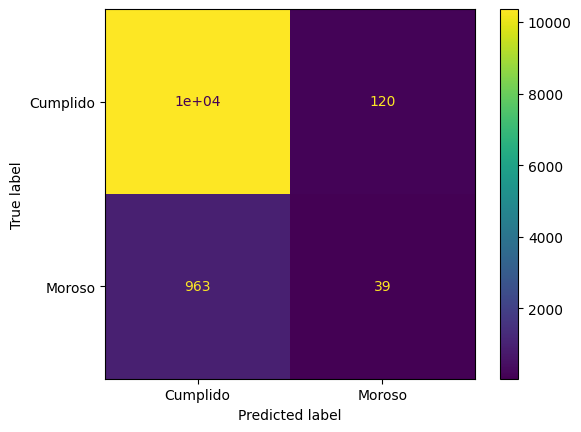

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

## Luri:
# Detector de Frutas: Entendiendo Precisión y Matriz de Confusión

¡Hola!  
Imagina que eres un **detector de frutas** en un supermercado. Tu trabajo es clasificar las frutas en dos categorías:

- **Manzanas**
- **No Manzanas**

---

## Precisión

Supón que tu detector de frutas es muy entusiasta y dice que casi todas las frutas son "**Manzanas**".  
En el montón de frutas, hay **90 manzanas** y **10 plátanos**.  
Tu detector dice que **95 frutas son manzanas** (¡incluyendo algunos plátanos!).

- Tu **precisión** sería alta porque acertaste con muchas de las frutas, pero **no estás haciendo un buen trabajo diferenciando manzanas de plátanos**.

> En la clase, la precisión mide qué tan bien tu modelo clasifica en general, pero **no te dice si está confundiendo "deudores" con "cumplidos" o viceversa**.

---

## Matriz de Confusión

Ahora, imagina que haces una tabla para registrar cómo tu detector de frutas está clasificando las frutas.  
La tabla se ve así:

|                     | Predicho: Manzana | Predicho: No Manzana |
|---------------------|:-----------------:|:--------------------:|
| **Realidad: Manzana**     |        85         |          5           |
| **Realidad: No Manzana**  |        10         |          0           |

- **Verdaderos Positivos (VP):** 85 manzanas fueron correctamente identificadas como manzanas.
- **Falsos Positivos (FP):** 10 plátanos fueron incorrectamente identificados como manzanas.
- **Falsos Negativos (FN):** 5 manzanas fueron incorrectamente identificadas como no manzanas.
- **Verdaderos Negativos (VN):** 0 plátanos fueron correctamente identificados como no manzanas.

---

### ¿Para qué sirve la matriz de confusión?

La matriz de confusión te muestra exactamente:

- Cuántos clientes **cumplidos** fueron correctamente identificados.
- Cuántos clientes **deudores** fueron correctamente identificados.
- Cuántos clientes **cumplidos** fueron incorrectamente identificados como **deudores** (¡un error costoso!).
- Cuántos clientes **deudores** fueron incorrectamente identificados como **cumplidos**.

---

> ¿Te sirvió la analogía para entender mejor la clase?


##  08 Para saber más: entendiendo la matriz de confusión

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

![datos-5.png](/home/pol/Escritorio/ipynb-alura/assets/datos-5.png)

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

* **Verdaderos Negativos (VN)**: Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.

* **Falsos Positivos (FP)**: Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.

* **Falsos Negativos (FN)**: Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.

* **Verdaderos Positivos (VP)**: Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

##  09 Matriz de confusión
Para evaluar un modelo de clasificación, podemos utilizar la precisión, que es un resultado general de aciertos del modelo expresado en porcentaje. Sin embargo, la precisión no siempre será suficiente para entender cómo está el desempeño del modelo.

Es posible utilizar la matriz de confusión para devolver un resultado más completo en relación al desempeño del modelo, conteniendo la cantidad de aciertos y errores del modelo para cada clase de la variable objetivo. Así, a partir de la matriz de confusión a continuación, que contiene los valores reales en las filas y valores predichos en las columnas y donde el valor 0 representa clientes cumplidores y 1 representa clientes morosos:

![datos-6.png](/home/pol/Escritorio/ipynb-alura/assets/datos-6.png)

Seleccione la alternativa que contiene la descripción correcta dependiendo del valor:


20 representa a los clientes morosos que el modelo clasificó correctamente como morosos.


Correcto, como la segunda fila representa a los clientes morosos reales y la segunda columna representa la predicción del modelo como morosos, 20 sería la cantidad de personas morosos que el modelo clasificó correctamente como morosos.

![datos-7.png](/home/pol/Escritorio/ipynb-alura/assets/datos-7.png)



## Luri + Perplexity IA para el formato .md:
# Entendiendo la Matriz de Confusión con la Analogía del Detective

¡Hola!  
Vamos a usar una analogía para entender mejor el enunciado del ejercicio.

---

## El Caso del Detective

Imagina que eres un **detective** intentando resolver un caso.  
En este caso, el "caso" es **clasificar a los clientes en dos grupos**:

- **Cumplidores**: Los que pagan sus cuentas a tiempo.
- **Morosos**: Los que no pagan a tiempo.

---

## ¿Qué es la Matriz de Confusión?

Piensa en la **matriz de confusión** como una tabla que te muestra qué tan bien estás haciendo tu trabajo como detective:

- **Filas**: Representan la **verdad** (si el cliente realmente es cumplidor o moroso).
- **Columnas**: Representan tus **predicciones** (cómo clasificaste a cada cliente).

---

## Analogía del Detective

- **Verdadero Positivo (VP):**  
  Clientes **morosos** que correctamente identificaste como morosos.  
  _¡Buen trabajo, detective!_

- **Verdadero Negativo (VN):**  
  Clientes **cumplidores** que correctamente identificaste como cumplidores.  
  _¡Otro caso resuelto!_

- **Falso Positivo (FP):**  
  Clientes **cumplidores** que incorrectamente identificaste como morosos (falsa alarma).  
  _¡Cuidado, detective, podrías estar acusando a alguien inocente!_

- **Falso Negativo (FN):**  
  Clientes **morosos** que incorrectamente identificaste como cumplidores (dejaste escapar al culpable).  
  _¡Ups, se te escapó uno!_

---

## Resumen

La **matriz de confusión** te ayuda a ver **dónde estás acertando y dónde te estás equivocando** como detective (o como modelo de clasificación).  
Así puedes mejorar tu estrategia para resolver casos futuros.

---

> Ahora, con esta analogía en mente, ¿puedes identificar qué representa cada valor en la matriz de confusión del ejercicio?  
> Recuerda que el objetivo es entender qué significan los números **9767, 79, 939 y 20** en el contexto de clientes cumplidores y morosos.

---

¡Espero que esta analogía te sea útil!  
Avísame si tienes más preguntas.


##  10 Desafío: construyendo un segundo modelo

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca `Scikit-Learn` tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la `matriz de confusión`, y compara los resultados con el resultado del `árbol de decisión`.

Como un consejo, revisa la documentación del algoritmo `RandomForestClassifier`. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

## Opinión del instructor

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [16]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [ ]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {modelo.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de validación: {modelo.score(x_val, y_val)}')

Al ejecutar el código, obtendremos el siguiente resultado:

Precisión de entrenamiento: 0.9154761904761904

Precisión de validación: 0.9127253723543245

Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

In [ ]:
y_previsto = modelo.predict(x_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

Al ejecutar el código, obtendremos el siguiente resultado:

![datos-8.png](/home/pol/Escritorio/ipynb-alura/assets/datos-8.png)


A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

##  11 Desafío: hora de la práctica
Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

1. - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con `pandas`.

2. - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos.

3. - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y RandomForestClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro `max_depth` del algoritmo `DecisionTreeClassifier` y el valor 2 para el `max_depth` del algoritmo `RandomForestClassifie`r`, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4. - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método `predict` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

## Opinión del instructor

Solución para los desafíos

1. - Para hacer la lectura de la base de datos, debemos importar la biblioteca pandas. Hacemos esto con el código:

In [17]:
import pandas as pd

A partir de esto, podemos hacer la lectura con la función read_csv(), almacenando en una variable datos:

In [18]:
datos = pd.read_csv('../data/diabetes.csv')

Con los datos almacenados, necesitamos identificar cuál es la columna que representa la variable objetivo. Podemos explorar los datos a partir del código:

In [19]:
datos.head(3)

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1


La base de datos tiene solo 394 filas y 6 columnas. Podemos observar 6 columnas de datos: glicemia, presion_sanguinea, pliegue_cutaneo_triceps, insulina, imc y diabetes. La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [20]:
x = datos.drop('diabetes', axis = 1)
y = datos['diabetes']

2. - Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método train_test_split de la biblioteca Scikit-Learn. Primero debemos importar la función con el código:

In [21]:
from sklearn.model_selection import train_test_split

La primera división se hará de los datos de prueba y luego con el resto se hará una nueva división entre entrenamiento y validación, usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo entre los conjuntos. Dado que la base de datos tiene pocos registros, solo se dividirá el 5% de los datos para prueba para que haya una cantidad mayor de registros en la base de datos de entrenamiento:

In [22]:
x, x_prueba, y, y_prueba = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_entrenamiento, x_val, y_entrenamiento, y_val = train_test_split(x, y, stratify = y, random_state = 5)

3. - La primera etapa para la creación de los modelos será la importación de los algoritmos DecisionTreeClassifier y RandomForestClassifier, usando el código:

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [24]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

In [25]:
arbol.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {arbol.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {arbol.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [26]:
random_forest.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {random_forest.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7357142857142858
Precisión de prueba: 0.6914893617021277


4. - Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

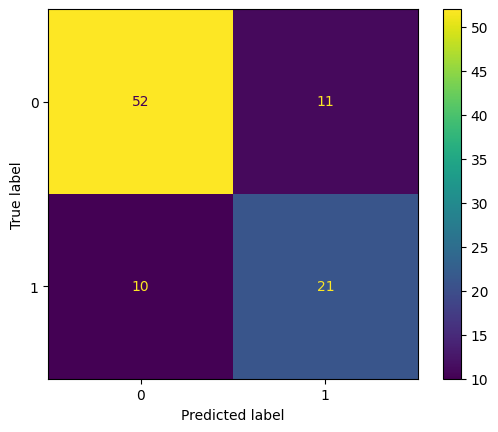

In [28]:
prediccion_arbol = arbol.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

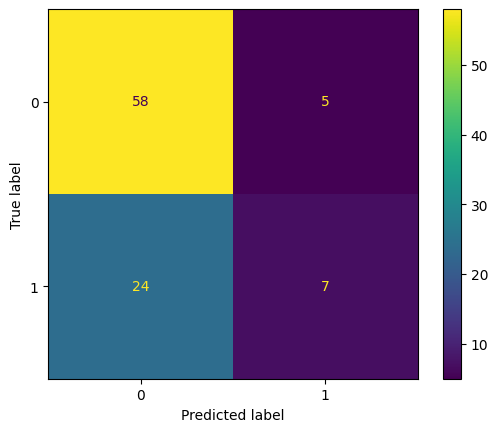

In [29]:
prediccion_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

##  12 Lo que aprendimos

En esta clase, aprendiste a:

* **Crear un modelo de clasificación usando Scikit-Learn;**

* **Validar modelos a partir de la división de datos de entrenamiento, validación y prueba;**

* **Evaluar el rendimiento de los modelos usando la precisión;**

* **Analizar los aciertos y errores del modelo con la matriz de confusión.**
----

# 2 - Métricas de evaluación

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
45/(45+123) #precision

0.26785714285714285

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.24528301886792453
La sensibilidad (Recall) del modelo es: 0.038922155688622756
La exactitud (accuracy) del modelo es: 0.9056702377841651


In [ ]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.06718346253229975


### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [ ]:
from sklearn.metrics import RocCurveDisplay

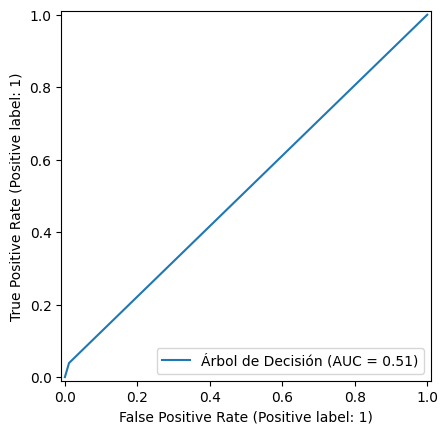

In [ ]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5137353406556483


### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

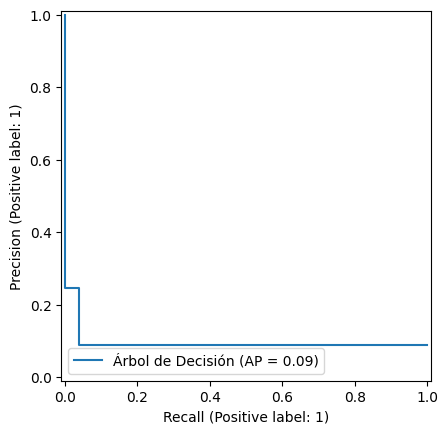

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.09342465484893667


### Informe de métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.43937182, 0.4902854 , 0.41775084, 0.33076739, 0.39368367]),
 'score_time': array([0.0133059 , 0.00542164, 0.00740218, 0.00496316, 0.00537705]),
 'test_score': array([0.91224823, 0.90755662, 0.90733885, 0.91343641, 0.89928136])}

In [ ]:
cv_resultados['test_score']

array([0.91224823, 0.90755662, 0.90733885, 0.91343641, 0.89928136])

In [ ]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.9079722942458446
El desvío típico es de: 0.00498490924277103
El intervalo de confianza es: [0.8980024757603026,0.9179421127313866]


### Validación cruzada con sensibilidad

In [ ]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.54067683, 0.52914858, 0.47897983, 0.44882202, 0.47898102]),
 'score_time': array([0.00930619, 0.01590967, 0.00970817, 0.0084908 , 0.00934052]),
 'test_score': array([0.02642008, 0.01732673, 0.0196802 , 0.0156658 , 0.02543353])}

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.012294712619062573,0.029515819817609965]'

### Estratificando los datos

In [ ]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.019231173310998204,0.03813788842915827]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [ ]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7087139277960761,0.7563565769775773]'

### Pipeline para validación

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.2202623160757908,0.28411282596922155]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.626190186409006,0.698812537741915]'

### Probando el modelo

In [ ]:
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



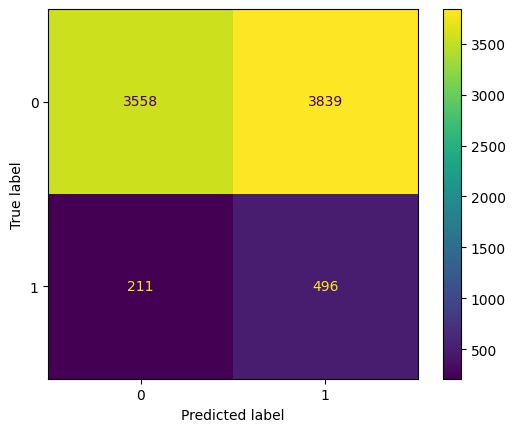

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);